In [296]:
import pandas as pd
from IPython.display import Image
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
pi = np.pi

# Scaling of coherent signal using excel spreadsheet

Experiment to see if we can incorporate a simple excel spreadsheet to atomatically scale power in python notebook. <br>
Why:
* Keep losses estimates in a document type that is easy to interact with (excel).
* Mantains powerful scripting and plotting capabilities of python notebook
* And permits documentation with Jupyter: Markdown, equations, external images, etc. 


### First part: Loading data from excel

This cell calls a pandas function which reads the excel file containing optical losses in the coherent link.

In [297]:
losses_df = pd.read_excel('data/Self_homodyne_link_loss_sketch.xlsx',\
                          sheet_name='Sheet1',index_col=0,header=14)

Then, we want to remove all rows that are filled entirely by nans. And transpose because here is better to have it vertical. In Excel it was convenient to have the losses horizontally because they matched the drawings. 

In [298]:
df = losses_df[losses_df.index.notnull()]
df = df.T
df = df.drop(df.index[13])

### Display data

In [300]:
s = df.style.format("{:.1f}") # Make numbers easier to read
s

,S Pav (dBm),LO Pav (dBm),Penalty (dB),S aggr Penalty (dB),LO aggr Penalty (dB)
Laser,16.0,nan,nan,nan,nan
Attach,11.0,11.0,-5.0,nan,nan
Splitter (S),nan,9.2,-1.8,nan,nan
Splitter (LO),6.2,nan,-4.8,-9.8,-6.8
DP IQM,2.2,nan,-4.0,-13.8,nan
CWDM Tx,1.2,8.2,-1.0,-14.8,-7.8
Tx Vgroove,-0.8,6.2,-2.0,-16.8,-9.8
Channel,-2.8,4.2,-2.0,-18.8,-11.8
Rx Vgroove,-4.8,2.2,-2.0,-20.8,-13.8
CWDM Rx,-5.8,1.2,-1.0,-21.8,-14.8


![](img/link_laser_forward.png "Laser forwarding scheme")

Index(['S Pav (dBm)', 'LO Pav (dBm)', 'Penalty (dB)', 'S aggr Penalty (dB)',
       'LO aggr Penalty (dB)'],
      dtype='object')

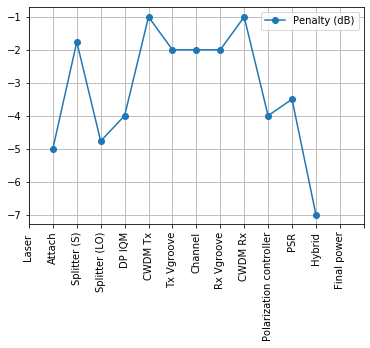

In [314]:
df.plot(y = 2,marker='o')
plt.xticks(range(len(df.index)+1),df.index,rotation='vertical')
plt.grid()
df.columns

Index(['S Pav (dBm)', 'LO Pav (dBm)', 'Penalty (dB)', 'S aggr Penalty (dB)',
       'LO aggr Penalty (dB)'],
      dtype='object')

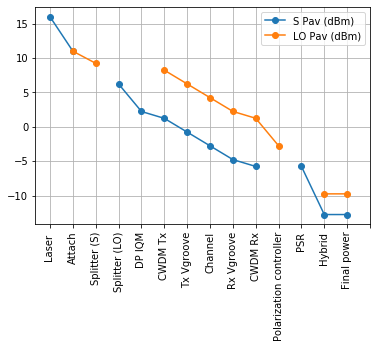

In [315]:
df.plot(y = [0,1],marker='o')
plt.xticks(range(len(df.index)+1),df.index,rotation='vertical')
plt.grid()
df.columns

Index(['S Pav (dBm)', 'LO Pav (dBm)', 'Penalty (dB)', 'S aggr Penalty (dB)',
       'LO aggr Penalty (dB)'],
      dtype='object')

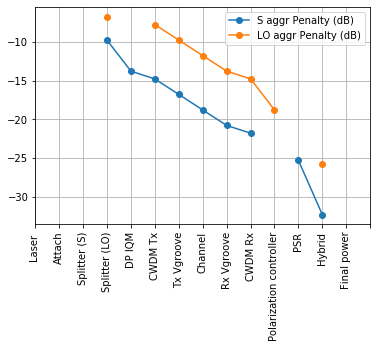

In [316]:
df.plot(y = [3,4],marker='o')
plt.xticks(range(len(df.index)+1),df.index,rotation='vertical')
plt.grid()
df.columns